In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("../input/insurance-dataset/Insurance cross sell.csv")
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
data.drop('id',axis=1,inplace=True)

In [4]:
gender=pd.get_dummies(data['Gender'],drop_first=True)

In [5]:
vehicle_age=pd.get_dummies(data['Vehicle_Age'],drop_first=True)

In [6]:
vehicle_damage=pd.get_dummies(data['Vehicle_Damage'],drop_first=True)

In [7]:
data= pd.concat([data,gender,vehicle_age,vehicle_damage],axis=1)

In [8]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Male,< 1 Year,> 2 Years,Yes
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,1,0,1,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,1,0,0,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,1,0,1,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,1,1,0,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,0,1,0,0


In [9]:
data.drop(['Gender','Vehicle_Age','Vehicle_Damage',],axis=1,inplace=True)

In [10]:
data.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Male,< 1 Year,> 2 Years,Yes
0,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1
1,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0
2,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1
3,21,1,11.0,1,28619.0,152.0,203,0,1,1,0,0
4,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0


In [11]:
X= data.drop('Response',axis=1)
Y= data['Response']

In [12]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", Y_test.shape)

Number transactions X_train dataset:  (342998, 11)
Number transactions y_train dataset:  (342998,)
Number transactions X_test dataset:  (38111, 11)
Number transactions y_test dataset:  (38111,)


In [13]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, Y_train_res = sm.fit_sample(X_train, Y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_Y: {} \n'.format(Y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(Y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_res==0)))

Before OverSampling, counts of label '1': 41927
Before OverSampling, counts of label '0': 301071 

After OverSampling, the shape of train_X: (602142, 11)
After OverSampling, the shape of train_Y: (602142,) 

After OverSampling, counts of label '1': 301071
After OverSampling, counts of label '0': 301071


In [14]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
model = GaussianNB()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['var_smoothing'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,1e-6,1e-7,1e-8,1e-9,1e-10,1e-11,1e-12,1e-13,1e-14]
search = GridSearchCV(model, space, scoring='recall', n_jobs=-1, cv=cv)
result = search.fit(X_train_res, Y_train_res)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9175044499204003
Best Hyperparameters: {'var_smoothing': 1e-09}


In [17]:
model=GaussianNB(var_smoothing=1e-9)

In [18]:
model.fit(X_train_res, Y_train_res)

GaussianNB()

In [19]:
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score

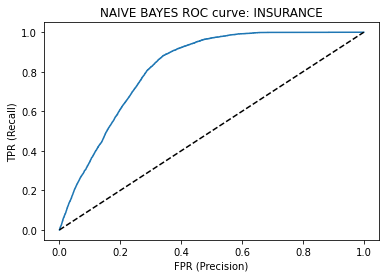

Area under curve (AUC):  0.8202394946436256


In [20]:
y_score = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(Y_test, y_score)

plt.title('NAIVE BAYES ROC curve: INSURANCE')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))